In [98]:
import sys
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import warnings
import pandas as pd
warnings.filterwarnings('ignore')
import numpy as np
from tqdm.auto import tqdm

import pandas as pd
import seaborn as sns
sys.path.append(r'reflutils')
from reflutils import FileDialog, Refl, tree

from pathlib import Path
import ipywidgets as widgets
from IPython.display import display, clear_output

In [4]:
# Frozen znpc uses outdated file sorting and needs to be handled separately
# run only once

ZRT = FileDialog.getDirectory()
ZRTenergies = [e for e in ZRT.iterdir() if e.is_dir()]
C60 = FileDialog.getDirectory()
C60energies = [e for e in C60.iterdir() if e.is_dir()]

zrt = ["250.0", "283.7"]
c60 = ["283.7","284.0", "284.2"]

ZRTLong_scans_100 = [e / "100.0" for e in ZRTenergies if e.name in zrt]
ZRTLong_scans_190 = [e / "190.0" for e in ZRTenergies if e.name in zrt]
C60Long_scans_100 = [e / "100.0" for e in C60energies if e.name in c60]
C60Long_scans_190 = [e / "190.0" for e in C60energies if e.name in c60]

display(ZRTLong_scans_100)
display(ZRTLong_scans_190)
display(C60Long_scans_100)
display(C60Long_scans_190)

[WindowsPath('C:/Users/hduva/Washington State University (email.wsu.edu)/Carbon Lab Research Group - Documents/Synchrotron Logistics and Data/ALS - Berkeley/Data/BL1101/2023Jun/XRR/Processed Data/ZRT/250.0/100.0'),
 WindowsPath('C:/Users/hduva/Washington State University (email.wsu.edu)/Carbon Lab Research Group - Documents/Synchrotron Logistics and Data/ALS - Berkeley/Data/BL1101/2023Jun/XRR/Processed Data/ZRT/283.7/100.0')]

[WindowsPath('C:/Users/hduva/Washington State University (email.wsu.edu)/Carbon Lab Research Group - Documents/Synchrotron Logistics and Data/ALS - Berkeley/Data/BL1101/2023Jun/XRR/Processed Data/ZRT/250.0/190.0'),
 WindowsPath('C:/Users/hduva/Washington State University (email.wsu.edu)/Carbon Lab Research Group - Documents/Synchrotron Logistics and Data/ALS - Berkeley/Data/BL1101/2023Jun/XRR/Processed Data/ZRT/283.7/190.0')]

[WindowsPath('C:/Users/hduva/Washington State University (email.wsu.edu)/Carbon Lab Research Group - Documents/Synchrotron Logistics and Data/ALS - Berkeley/Data/BL1101/2023Jun/XRR/Processed Data/ZC60/283.7/100.0'),
 WindowsPath('C:/Users/hduva/Washington State University (email.wsu.edu)/Carbon Lab Research Group - Documents/Synchrotron Logistics and Data/ALS - Berkeley/Data/BL1101/2023Jun/XRR/Processed Data/ZC60/284.0/100.0'),
 WindowsPath('C:/Users/hduva/Washington State University (email.wsu.edu)/Carbon Lab Research Group - Documents/Synchrotron Logistics and Data/ALS - Berkeley/Data/BL1101/2023Jun/XRR/Processed Data/ZC60/284.2/100.0')]

[WindowsPath('C:/Users/hduva/Washington State University (email.wsu.edu)/Carbon Lab Research Group - Documents/Synchrotron Logistics and Data/ALS - Berkeley/Data/BL1101/2023Jun/XRR/Processed Data/ZC60/283.7/190.0'),
 WindowsPath('C:/Users/hduva/Washington State University (email.wsu.edu)/Carbon Lab Research Group - Documents/Synchrotron Logistics and Data/ALS - Berkeley/Data/BL1101/2023Jun/XRR/Processed Data/ZC60/284.0/190.0'),
 WindowsPath('C:/Users/hduva/Washington State University (email.wsu.edu)/Carbon Lab Research Group - Documents/Synchrotron Logistics and Data/ALS - Berkeley/Data/BL1101/2023Jun/XRR/Processed Data/ZC60/284.2/190.0')]

In [5]:
# run only once

ZRTRefl_100 = {e.parent.name: Refl(e) for e in tqdm(ZRTLong_scans_100)}
ZRTRefl_190 = {e.parent.name: Refl(e) for e in tqdm(ZRTLong_scans_190)}

C60Refl_100 = {e.parent.name: Refl(e) for e in tqdm(C60Long_scans_100)}
C60Refl_190 = {e.parent.name: Refl(e) for e in tqdm(C60Long_scans_190)}

for e in zrt:
    ZRTRefl_100[e].refl.to_csv(f"ZRT_{e}_100.csv")
    ZRTRefl_100[e].images.to_pickle(f"ZRT_{e}_100.pickle")
    ZRTRefl_190[e].refl.to_csv(f"ZRT_{e}_190.csv")
    ZRTRefl_190[e].images.to_pickle(f"ZRT_{e}_190.pickle")
for e in c60:
    C60Refl_100[e].refl.to_csv(f"C60_{e}_100.csv")
    C60Refl_190[e].refl.to_csv(f"C60_{e}_190.csv")
    C60Refl_100[e].images.to_pickle(f"C60_{e}_100.pickle")
    C60Refl_190[e].images.to_pickle(f"C60_{e}_190.pickle")

xrr = {"zrt": {"100": ZRTRefl_100, "190": ZRTRefl_190}, "c60": {"100": C60Refl_100, "190": C60Refl_190}}

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

In [145]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.colors as mcolors
import ipywidgets as widgets
from ipywidgets import interact,  fixed
import numpy as np
%matplotlib widget


def widget(sample, polarization, energy, q):
    plt.close("all")

    obj = xrr[sample][polarization][energy]
    images = obj.images.loc[obj.images["Q"] == q]
    point = obj.refl.loc[obj.refl["Q"] == q]

    imin = min([image.min() for image in obj.images["Beam"]])
    imax = max([image.max() for image in obj.images["Beam"]])

    ncols =  9# | masked | filtered | beam | dark | . . . refl . . . |
    if len(images) == 1:
        nrows = 2
    else:
        nrows = len(images) # | image 1 ... image N| and  | . . . refl . . . |

    fig = plt.figure(figsize=(12, 6))
    gs = GridSpec(nrows=nrows, ncols = ncols, figure=fig, wspace=0, hspace=0.1) 

    norm = mcolors.Normalize(vmin=imin, vmax=imax)
    if len(images) == 1:
        masked = fig.add_subplot(gs[0, 0], xticks=[], yticks=[])
        masked.imshow(images["Masked"].iloc[0], norm=norm, cmap="coolwarm")

        filter = fig.add_subplot(gs[0, 1], xticks=[], yticks=[])
        filter.imshow(images["Filtered"].iloc[0], norm=norm, cmap="coolwarm")

        beam = fig.add_subplot(gs[1,0], xticks=[], yticks=[])
        beam.imshow(images["Beam"].iloc[0], norm=norm, cmap="coolwarm")

        dark = fig.add_subplot(gs[1,1], xticks=[], yticks=[])
        dark.imshow(images["Dark"].iloc[0], norm=norm, cmap="coolwarm")
    else:
        for i, image in enumerate(images["Masked"]):
            # generate axes
            masked = fig.add_subplot(gs[i, 0], xticks=[], yticks=[])

            masked.imshow(image, norm=norm, cmap="coolwarm")

            filter = fig.add_subplot(gs[i, 1], xticks=[], yticks=[])
            filter.imshow(images["Filtered"].iloc[i], norm=norm, cmap="coolwarm")

            beam = fig.add_subplot(gs[i, 2], xticks=[], yticks=[])
            beam.imshow(images["Beam"].iloc[i], norm=norm, cmap="coolwarm")

            dark = fig.add_subplot(gs[i, 3], xticks=[], yticks=[])
            dark.imshow(images["Dark"].iloc[i], norm=norm, cmap="coolwarm")

    colors = plt.cm.ScalarMappable(norm=norm, cmap="coolwarm")
    color_values = colors.to_rgba(obj.refl["RawRefl"])
    sns.set_style("darkgrid")
    refl = fig.add_subplot(gs[:, 4:])
    refl.set_yscale("log")
    obj.plot(ax=refl, color=color_values, marker=".", label="Raw Reflectivity")
    refl.yaxis.tick_right()

    refl.axvline(x=q, color="black", linestyle="--", alpha = .5)
    refl.set_ylabel("Reflectivity")
    refl.legend()

    cax = fig.add_axes([.1, 0.11, 0.01, 0.77])
    cax.yaxis.set_ticks_position('left')
    cb = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap="coolwarm"), cax=cax, format="%.1e")
    if len(point)> 0:
        display(point)


    plt.show()
    
def widgetWrapper(sample, polarization, energy):
    refl = xrr[sample][polarization][energy]
    q = widgets.SelectionSlider(options=refl.images["Q"], description="Q", continuous_update=False)
    interact(widget, sample=fixed(sample), polarization=fixed(polarization), energy=fixed(energy), q=q)

clear_output()

In [96]:
widgetWrapper("zrt", "100", "250.0")

interactive(children=(SelectionSlider(continuous_update=False, description='Q', options=(0.0, 0.0, 0.0, 0.0, 0…

In [99]:
clear_output()

In [128]:
widgetWrapper("zrt", "100", "283.7")

interactive(children=(SelectionSlider(continuous_update=False, description='Q', options=(0.0, 0.0, 0.0, 0.0, 0…

In [7]:
widgetWrapper("zrt", "190", "250.0")

interactive(children=(SelectionSlider(continuous_update=False, description='Q', options=(0.001, 0.0021, 0.0031…

In [8]:
widgetWrapper("zrt", "190", "283.7")

interactive(children=(SelectionSlider(continuous_update=False, description='Q', options=(0.001, 0.0021, 0.0031…

In [9]:
widgetWrapper("c60", "100", "283.7")

interactive(children=(SelectionSlider(continuous_update=False, description='Q', options=(0.001, 0.0021, 0.0031…

In [10]:
widgetWrapper("c60", "100", "284.0")

interactive(children=(SelectionSlider(continuous_update=False, description='Q', options=(0.001, 0.0021, 0.0031…

In [11]:
widgetWrapper("c60", "100", "284.2")

interactive(children=(SelectionSlider(continuous_update=False, description='Q', options=(0.001, 0.0021, 0.0031…

In [100]:
widgetWrapper("c60", "190", "283.7")

interactive(children=(SelectionSlider(continuous_update=False, description='Q', options=(0.0, 0.0, 0.0, 0.0, 0…

No such comm: 0c55198669d14bacbcb6fd17eab1138d


No such comm: bac310b0a5e94d4788d2b9fdc6772c84


No such comm: a2e93d65db494a419b7c697cf4907b09


No such comm: 756e302cc0784091b478e233948ab6e2


No such comm: 4db665ec5f6d4719bb4a5032990ccd86


No such comm: 030292145ed846c2914fb66cfd911038


No such comm: 8820c9f29e394d6da605fc1798b5641b


No such comm: ed641671a4b0435e855b3ac3c2fd68ef


No such comm: fa35be196de344f4bae64cf13277117e


No such comm: 9db7d7997e804346ab9a8c4f4bafc02a


No such comm: c75e2a63274d489f8d3c86e23144f2fa


No such comm: 4daafe2f5a7c42a38990b35efa62c737


In [107]:
widgetWrapper("c60", "190", "284.0")

interactive(children=(SelectionSlider(continuous_update=False, description='Q', options=(0.0, 0.0, 0.0, 0.0, 0…

In [124]:
widgetWrapper("c60", "190", "284.2")

interactive(children=(SelectionSlider(continuous_update=False, description='Q', options=(0.0, 0.0, 0.0, 0.0, 0…

No such comm: 0528690e0fe44073ad0e0e6ec38c7b34


No such comm: 0ead1db9190c45cea38e8e320a4525ef


No such comm: 253eac09adb34c8984c7ff0d88f9e94c


No such comm: a7a995e0679546d6a70fa35f511cb908


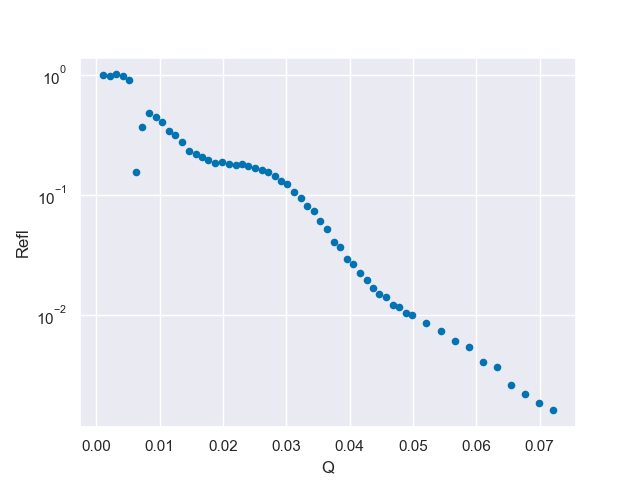

In [138]:
short_scan = FileDialog.getDirectory()
short_xrr = Refl(short_scan)
short_xrr.plot()

In [144]:
@interact(i = (0,20,1))
def show(i):
    plt.close("all")
    im = short_xrr.images["Masked"].iloc[i]
    min = im.min()
    max = im.max()
    norm = mcolors.Normalize(vmin=min, vmax=max)

    fig, ax = plt.subplots()
    ax.imshow(im, norm=norm, cmap="coolwarm")
    cb = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap="coolwarm"), ax=ax)

    plt.show()

interactive(children=(IntSlider(value=10, description='i', max=20), Output()), _dom_classes=('widget-interact'…

No such comm: f15b83faa5fb4579a40786ac1b5bf2e4


No such comm: a827f1739fde4159a0f0d4309b9677c6


No such comm: 59618fc917f54d438ecdf902e2e6f17f


No such comm: 2d07d5b0e886479bb43e91517eb7e52b


No such comm: 2e32be9697a04586b2ac9b1ce4915780


No such comm: fe1187c38dd04b73ac98ed9239b702cc


No such comm: 8975c22aa8124b39b20497e8263fb9c4


No such comm: efe23df5fe154263b6e202c4c7b69958


No such comm: 9aed9af3dc52484c886521ef4596db31
